## Project Housing Prices 

### Bước 1: Import thư viện


In [83]:
#load Thư viện
import sys  # Kiểm tra phiên bản Python
print("Python version: {}". format(sys.version))

import pandas as pd # Xử lý dữ liệu dạng bảng (DataFrame).
print("pandas version: {}". format(pd.__version__))

import matplotlib  # Vẽ biểu đồ khoa học
print("matplotlib version: {}". format(matplotlib.__version__))

import numpy as np # Tính toán khoa học, xử lý mảng số học
print("NumPy version: {}". format(np.__version__))

import scipy as sp # Công cụ toán học nâng cao
print("SciPy version: {}". format(sp.__version__)) 

import IPython
from IPython import display # Hiển thị dữ liệu đẹp hơn trong Jupyter Notebook
print("IPython version: {}". format(IPython.__version__)) 

import sklearn # Các thuật toán Machine Learning
print("scikit-learn version: {}". format(sklearn.__version__))

import random # Làm việc với các số ngẫu nhiên
import time # Xử lý thời gian

# Tắt cảnh báo không quan trọng
import warnings
warnings.filterwarnings('ignore')

Python version: 3.12.3 | packaged by conda-forge | (main, Apr 15 2024, 18:20:11) [MSC v.1938 64 bit (AMD64)]
pandas version: 2.2.2
matplotlib version: 3.9.2
NumPy version: 1.26.4
SciPy version: 1.13.1
IPython version: 8.27.0
scikit-learn version: 1.5.1


In [84]:
#Common Model Algorithms
from sklearn import svm, tree, linear_model, neighbors, naive_bayes, ensemble, discriminant_analysis, gaussian_process
from xgboost import XGBClassifier

#Common Model Helpers
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from sklearn import feature_selection
from sklearn import model_selection
from sklearn import metrics
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

#Visualization
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.pylab as pylab
import seaborn as sns
from pandas.plotting import scatter_matrix



### Bước 2: Đọc dữ liệu

In [85]:

# Đọc file dữ liệu từ Kaggle
data_raw = pd.read_csv('./data/train.csv')
data_val = pd.read_csv('./data/test.csv')

# Sao chép dữ liệu để làm sạch mà không ảnh hưởng đến bản gốc
data1 = data_raw.copy(deep=True)

# Danh sách chứa cả tập train và test (tiện xử lý dữ liệu)
data_cleaner = [data1, data_val]

In [86]:
data1.columns


Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [87]:
# review Data
data1.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,...,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,...,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,...,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [88]:
data1['Condition2'].describe()

count     1460
unique       8
top       Norm
freq      1445
Name: Condition2, dtype: object

## Bước 3: Mô tả dữ liệu

In [89]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             1460 non-null   int64  
 1   MSSubClass     1460 non-null   int64  
 2   MSZoning       1460 non-null   object 
 3   LotFrontage    1201 non-null   float64
 4   LotArea        1460 non-null   int64  
 5   Street         1460 non-null   object 
 6   Alley          91 non-null     object 
 7   LotShape       1460 non-null   object 
 8   LandContour    1460 non-null   object 
 9   Utilities      1460 non-null   object 
 10  LotConfig      1460 non-null   object 
 11  LandSlope      1460 non-null   object 
 12  Neighborhood   1460 non-null   object 
 13  Condition1     1460 non-null   object 
 14  Condition2     1460 non-null   object 
 15  BldgType       1460 non-null   object 
 16  HouseStyle     1460 non-null   object 
 17  OverallQual    1460 non-null   int64  
 18  OverallC

### 📌 Mô tả các cột dữ liệu trong tập `House Prices`

#### 🎯 **Biến mục tiêu**
- **`SalePrice`**: Giá bán của ngôi nhà (USD) - đây là biến mà chúng ta cần dự đoán.

---

#### 🏠 **Thông tin chung về ngôi nhà**
- **`MSSubClass`**: Loại tòa nhà (dạng số, ví dụ: 20 = 1 tầng, 30 = 1 tầng kèm gác xép, v.v.).
- **`MSZoning`**: Loại phân vùng (khu dân cư, thương mại, nông thôn, v.v.).
- **`LotFrontage`**: Chiều dài mặt tiền tiếp giáp với đường (feet).
- **`LotArea`**: Diện tích khu đất (square feet).
- **`Neighborhood`**: Vị trí khu dân cư trong thành phố.
- **`Condition1`** & **`Condition2`**: Mức độ gần với đường chính, đường ray, sông suối, v.v.
- **`BldgType`**: Loại hình nhà ở (đơn lập, song lập, chung cư, v.v.).
- **`HouseStyle`**: Kiểu dáng ngôi nhà (tầng trệt, tầng gác xép, nhà phố, v.v.).

---

#### 🔨 **Chất lượng và tình trạng của ngôi nhà**
- **`OverallQual`**: Đánh giá tổng quan về chất lượng vật liệu và hoàn thiện (1 = rất kém, 10 = tuyệt vời).
- **`OverallCond`**: Đánh giá tổng quan về tình trạng của ngôi nhà (1 = rất kém, 10 = tuyệt vời).
- **`YearBuilt`**: Năm xây dựng.
- **`YearRemodAdd`**: Năm cải tạo hoặc sửa chữa lần cuối.

---

#### 🏠 **Mái nhà và ngoại thất**
- **`RoofStyle`**: Kiểu mái nhà (mái bằng, mái dốc, mái tam giác, v.v.).
- **`RoofMatl`**: Loại vật liệu làm mái.
- **`Exterior1st`** & **`Exterior2nd`**: Loại vật liệu bên ngoài ngôi nhà.
- **`MasVnrType`**: Loại vật liệu lát tường ngoài.
- **`MasVnrArea`**: Diện tích tường ngoài được lát (square feet).
- **`ExterQual`**: Chất lượng vật liệu ngoại thất (Ex = Xuất sắc, Gd = Tốt, TA = Trung bình, v.v.).
- **`ExterCond`**: Tình trạng hiện tại của ngoại thất.

---

#### 🏗️ **Kết cấu nền móng và tầng hầm**
- **`Foundation`**: Loại nền móng (bê tông, gỗ, đá, v.v.).
- **`BsmtQual`**: Chiều cao tầng hầm.
- **`BsmtCond`**: Tình trạng tầng hầm.
- **`BsmtExposure`**: Tầng hầm có cửa sổ, lối đi hay không.
- **`BsmtFinType1`** & **`BsmtFinType2`**: Loại không gian tầng hầm đã hoàn thiện.
- **`BsmtFinSF1`** & **`BsmtFinSF2`**: Diện tích tầng hầm đã hoàn thiện (square feet).
- **`BsmtUnfSF`**: Diện tích tầng hầm chưa hoàn thiện (square feet).
- **`TotalBsmtSF`**: Tổng diện tích tầng hầm (square feet).

---

#### 🔥 **Hệ thống sưởi và làm mát**
- **`Heating`**: Loại hệ thống sưởi.
- **`HeatingQC`**: Chất lượng và tình trạng của hệ thống sưởi.
- **`CentralAir`**: Có điều hòa trung tâm hay không (Y/N).
- **`Electrical`**: Hệ thống điện của ngôi nhà.

---

#### 📏 **Diện tích sàn**
- **`1stFlrSF`**: Diện tích sàn tầng 1 (square feet).
- **`2ndFlrSF`**: Diện tích sàn tầng 2 (square feet).
- **`LowQualFinSF`**: Diện tích hoàn thiện chất lượng thấp.
- **`GrLivArea`**: Tổng diện tích sàn trên mặt đất (square feet).

---

#### 🚽 **Phòng tắm và phòng ngủ**
- **`BsmtFullBath`** & **`BsmtHalfBath`**: Số phòng tắm đầy đủ/nửa phòng tắm trong tầng hầm.
- **`FullBath`** & **`HalfBath`**: Số phòng tắm đầy đủ/nửa phòng tắm trên mặt đất.
- **`Bedroom`**: Số phòng ngủ.
- **`Kitchen`**: Số phòng bếp.
- **`KitchenQual`**: Chất lượng bếp (Ex = Xuất sắc, Gd = Tốt, v.v.).
- **`TotRmsAbvGrd`**: Tổng số phòng trên mặt đất (không tính phòng tắm).

---

#### 🏡 **Tiện ích và ngoại cảnh**
- **`Functional`**: Đánh giá về chức năng của ngôi nhà.
- **`Fireplaces`**: Số lượng lò sưởi.
- **`FireplaceQu`**: Chất lượng lò sưởi.
- **`GarageType`**: Kiểu garage (độc lập, gắn liền, không có, v.v.).
- **`GarageYrBlt`**: Năm xây dựng garage.
- **`GarageFinish`**: Mức độ hoàn thiện bên trong garage.
- **`GarageCars`**: Số chỗ đậu xe trong garage.
- **`GarageArea`**: Diện tích garage (square feet).
- **`GarageQual`** & **`GarageCond`**: Chất lượng và tình trạng garage.
- **`PavedDrive`**: Đường lái xe có được lát hay không (Y/N).

---

#### 🌳 **Không gian ngoài trời**
- **`WoodDeckSF`**: Diện tích sàn gỗ ngoài trời (square feet).
- **`OpenPorchSF`**: Diện tích hiên mở (square feet).
- **`EnclosedPorch`**: Diện tích hiên kín (square feet).
- **`3SsnPorch`**: Diện tích hiên ba mùa (square feet).
- **`ScreenPorch`**: Diện tích hiên có mái che (square feet).
- **`PoolArea`**: Diện tích hồ bơi (square feet).
- **`PoolQC`**: Chất lượng hồ bơi.
- **`Fence`**: Chất lượng hàng rào.
- **`MiscFeature`**: Các tiện ích đặc biệt khác (nhà kho, sân chơi, v.v.).
- **`MiscVal`**: Giá trị của tiện ích đặc biệt (USD).

---

#### 📅 **Thông tin bán nhà**
- **`MoSold`**: Tháng bán nhà.
- **`YrSold`**: Năm bán nhà.
- **`SaleType`**: Loại giao dịch mua bán.
- **`SaleCondition`**: Điều kiện giao dịch (bán gấp, hợp đồng đặc biệt, v.v.).


In [90]:
# Danh sách các biến phân loại (Categorical Features)
cat_features = [
    'MSSubClass', 'MSZoning', 'Street', 'Alley', 'LotShape', 'LandContour', 'Utilities', 
    'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType', 
    'HouseStyle', 'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType', 
    'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 
    'BsmtFinType1', 'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical', 
    'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType', 'GarageFinish', 'GarageQual', 
    'GarageCond', 'PavedDrive', 'PoolQC', 'Fence', 'MiscFeature', 'SaleType', 'SaleCondition'
]

# Danh sách các biến số (Numerical Features)
num_features = [
    'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd', 
    'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', '1stFlrSF', 
    '2ndFlrSF', 'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath', 
    'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'TotRmsAbvGrd', 'Fireplaces', 'GarageYrBlt', 
    'GarageCars', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF', 'EnclosedPorch', '3SsnPorch', 
    'ScreenPorch', 'PoolArea', 'MiscVal', 'MoSold', 'YrSold'
]


# Biến mục tiêu
target = ['SalePrice']

# In ra danh sách để kiểm tra
print("Categorical Features:", len(cat_features))
print("Numerical Features:", len(num_features))
print("Target Feature:", target)


Categorical Features: 44
Numerical Features: 35
Target Feature: ['SalePrice']


In [91]:

def convert_cat(df,features):
    for feature in features:
        df[feature] = df[feature].astype('category')
for data in data_cleaner:
    convert_cat(data,cat_features)

In [92]:
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1460 entries, 0 to 1459
Data columns (total 81 columns):
 #   Column         Non-Null Count  Dtype   
---  ------         --------------  -----   
 0   Id             1460 non-null   int64   
 1   MSSubClass     1460 non-null   category
 2   MSZoning       1460 non-null   category
 3   LotFrontage    1201 non-null   float64 
 4   LotArea        1460 non-null   int64   
 5   Street         1460 non-null   category
 6   Alley          91 non-null     category
 7   LotShape       1460 non-null   category
 8   LandContour    1460 non-null   category
 9   Utilities      1460 non-null   category
 10  LotConfig      1460 non-null   category
 11  LandSlope      1460 non-null   category
 12  Neighborhood   1460 non-null   category
 13  Condition1     1460 non-null   category
 14  Condition2     1460 non-null   category
 15  BldgType       1460 non-null   category
 16  HouseStyle     1460 non-null   category
 17  OverallQual    1460 non-null   in

In [93]:
data1.describe()

,Id,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,...,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,10516.828082,6.099315,5.575342,1971.267808,1984.865753,103.685262,443.639726,46.549315,...,94.244521,46.660274,21.954110,3.409589,15.060959,2.758904,43.489041,6.321918,2007.815753,180921.195890
std,421.610009,24.284752,9981.264932,1.382997,1.112799,30.202904,20.645407,181.066207,456.098091,161.319273,...,125.338794,66.256028,61.119149,29.317331,55.757415,40.177307,496.123024,2.703626,1.328095,79442.502883
min,1.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,34900.000000
25%,365.750000,59.000000,7553.500000,5.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5.000000,2007.000000,129975.000000
50%,730.500000,69.000000,9478.500000,6.000000,5.000000,1973.000000,1994.000000,0.000000,383.500000,0.000000,...,0.000000,25.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,163000.000000
75%,1095.250000,80.000000,11601.500000,7.000000,6.000000,2000.000000,2004.000000,166.000000,712.250000,0.000000,...,168.000000,68.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,214000.000000
max,1460.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,5644.000000,1474.000000,...,857.000000,547.000000,552.000000,508.000000,480.000000,738.000000,15500.000000,12.000000,2010.000000,755000.000000


In [94]:
data1.describe(include=['category'])

,MSSubClass,MSZoning,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,...,GarageType,GarageFinish,GarageQual,GarageCond,PavedDrive,PoolQC,Fence,MiscFeature,SaleType,SaleCondition
count,1460,1460,1460,91,1460,1460,1460,1460,1460,1460,...,1379,1379,1379,1379,1460,7,281,54,1460,1460
unique,15,5,2,2,4,4,2,5,3,25,...,6,3,5,5,3,3,4,4,9,6
top,20,RL,Pave,Grvl,Reg,Lvl,AllPub,Inside,Gtl,NAmes,...,Attchd,Unf,TA,TA,Y,Gd,MnPrv,Shed,WD,Normal
freq,536,1151,1454,50,925,1311,1459,1052,1382,225,...,870,605,1311,1326,1340,3,157,49,1267,1198


In [95]:
for data in data_cleaner:
    missing_values = data.isna().sum()  # Đếm số giá trị NaN trong mỗi cột
    missing_values = missing_values[missing_values > 0 ]  # Chỉ giữ lại các cột có giá trị bị thiếu
    missing_precent = round(missing_values * 100 / len(data), 2)
    print(missing_precent)  # In ra danh sách các cột có giá trị bị thiếu kèm phần trăm
    print("-" * 20)


LotFrontage     17.74
Alley           93.77
MasVnrType      59.73
MasVnrArea       0.55
BsmtQual         2.53
BsmtCond         2.53
BsmtExposure     2.60
BsmtFinType1     2.53
BsmtFinType2     2.60
Electrical       0.07
FireplaceQu     47.26
GarageType       5.55
GarageYrBlt      5.55
GarageFinish     5.55
GarageQual       5.55
GarageCond       5.55
PoolQC          99.52
Fence           80.75
MiscFeature     96.30
dtype: float64
--------------------
MSZoning         0.27
LotFrontage     15.56
Alley           92.67
Utilities        0.14
Exterior1st      0.07
Exterior2nd      0.07
MasVnrType      61.27
MasVnrArea       1.03
BsmtQual         3.02
BsmtCond         3.08
BsmtExposure     3.02
BsmtFinType1     2.88
BsmtFinSF1       0.07
BsmtFinType2     2.88
BsmtFinSF2       0.07
BsmtUnfSF        0.07
TotalBsmtSF      0.07
BsmtFullBath     0.14
BsmtHalfBath     0.14
KitchenQual      0.07
Functional       0.14
FireplaceQu     50.03
GarageType       5.21
GarageYrBlt      5.35
GarageFinish     5

# Bước 4: Trực quan hóa dữ liêu EDA

### Trực quan giữa các đặc trưc num với target

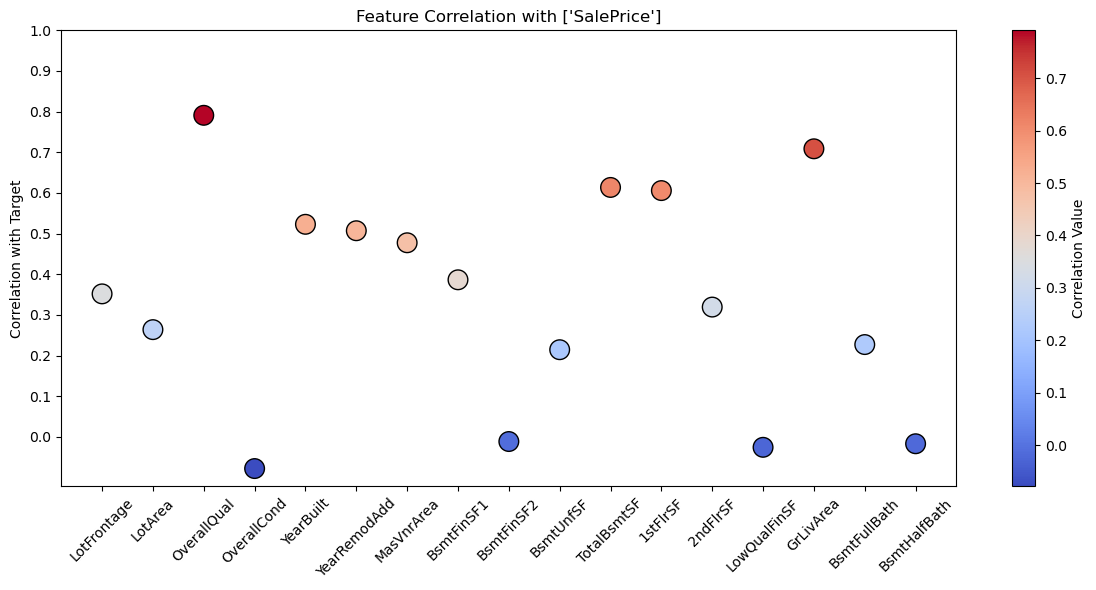

In [96]:
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

def correlation_with_target(df, target_col):
    corr_matrix = df.corr()
    target_corr = corr_matrix[target_col].drop(target_col)  

    plt.figure(figsize=(12, 6))
    scatter = plt.scatter(target_corr.index, target_corr.values, 
                          c=target_corr.values, cmap="coolwarm", edgecolor='k', s=200)
    
    plt.xticks(rotation=45)
    plt.ylabel("Correlation with Target")
    plt.title(f"Feature Correlation with {target_col}")
    plt.yticks(np.arange(0, 1.1, 0.1))
    
    # Thêm colorbar
    cbar = plt.colorbar(scatter)
    cbar.set_label("Correlation Value")
    plt.tight_layout()
    plt.show()

# Gọi hàm với target của bạn
columns = num_features[:17] +target
correlation_with_target(data1[columns], target)


- Ghi chú
  * Các features tính đặc trưng cao có thể sài: `LotFrontage`,`OverallQual`,`YearBuilt`,`YearRemodAdd`,`MasVnrArea`,`GrLivArea`
    `TotalBsmtSf`,`1stFlrSF`,`2ndFlrSF`,`BsmtFinSF1`

In [97]:
for data in data_cleaner:
    data.drop(columns=['LotArea','OverallCond','BsmtFinSF2','BsmtUnfSF','LowQualFinSF','BsmtHalfBath'],inplace=True)

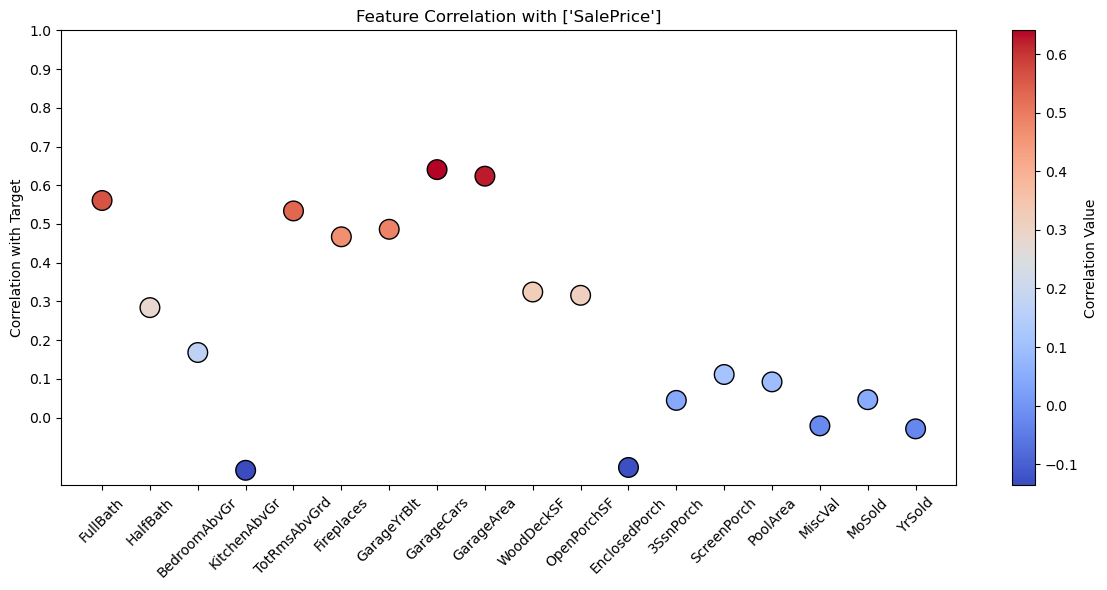

In [98]:
# Gọi hàm với target của bạn
columns = num_features[17:] +target
correlation_with_target(data1[columns], target)

- Ghi chú:1,2,5,6,7,8,9,10
  * Các features tính đặc trưng cáo có thể sài: `FullBath`,`HalfBath`,`TotRmsAbvGrd`,`Fireplaces`,`GarageYrBlt`,`GarageCars`
    `GarageArea`,`WooDeckSF`,`OpenPorchSF`

In [99]:
for data in data_cleaner:
    data.drop(columns=['BedroomAbvGr','KitchenAbvGr','EnclosedPorch','3SsnPorch','ScreenPorch','PoolArea','MiscVal','MoSold','YrSold'],inplace=True)

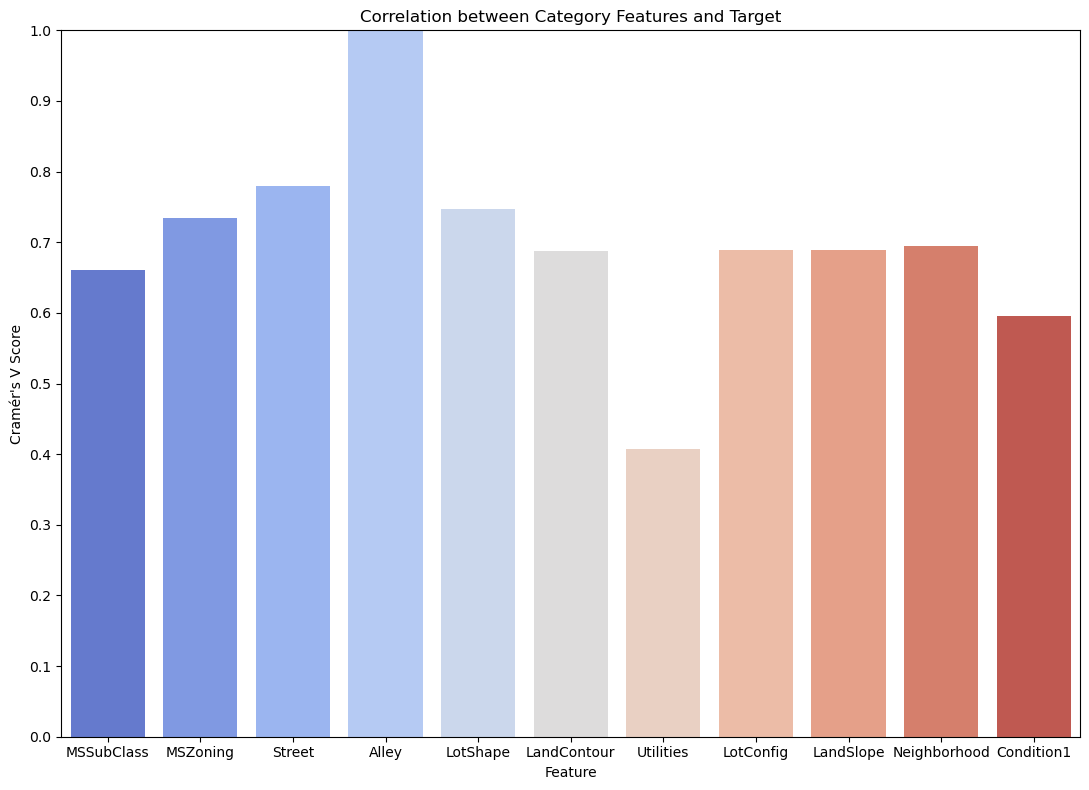

In [59]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency
import numpy as np

# Hàm tính Cramér's V
def cramers_v(cat1, cat2):
    confusion_matrix = pd.crosstab(cat1, cat2)
    chi2 = chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r, k = confusion_matrix.shape
    return np.sqrt(phi2 / min(r-1, k-1))

def correlation_category_target(df,columns):
    # Tính Cramér’s V cho từng feature với target
    cramers_v_scores = {feature: cramers_v(df[feature], df[target].squeeze()) for feature in columns}
    # Chuyển kết quả sang DataFrame
    cramers_v_df = pd.DataFrame(cramers_v_scores.items(), columns=["Feature", "Cramér's V"])
    
    # Vẽ biểu đồ
    plt.figure(figsize=(11,8))
    sns.barplot(x="Feature", y="Cramér's V", data=cramers_v_df, palette="coolwarm")
    # Chỉnh tần suất trục y
    plt.yticks(np.arange(0, 1.1, 0.1))  # Đặt mốc từ 0 đến 1 với bước nhảy 0.1
    plt.ylabel("Cramér's V Score")
    plt.title("Correlation between Category Features and Target")
    plt.ylim(0,1)  # Vì Cramér's V luôn từ 0 đến 1
    plt.tight_layout()
    plt.show()
correlation_category_target(data1,cat_features[:11])

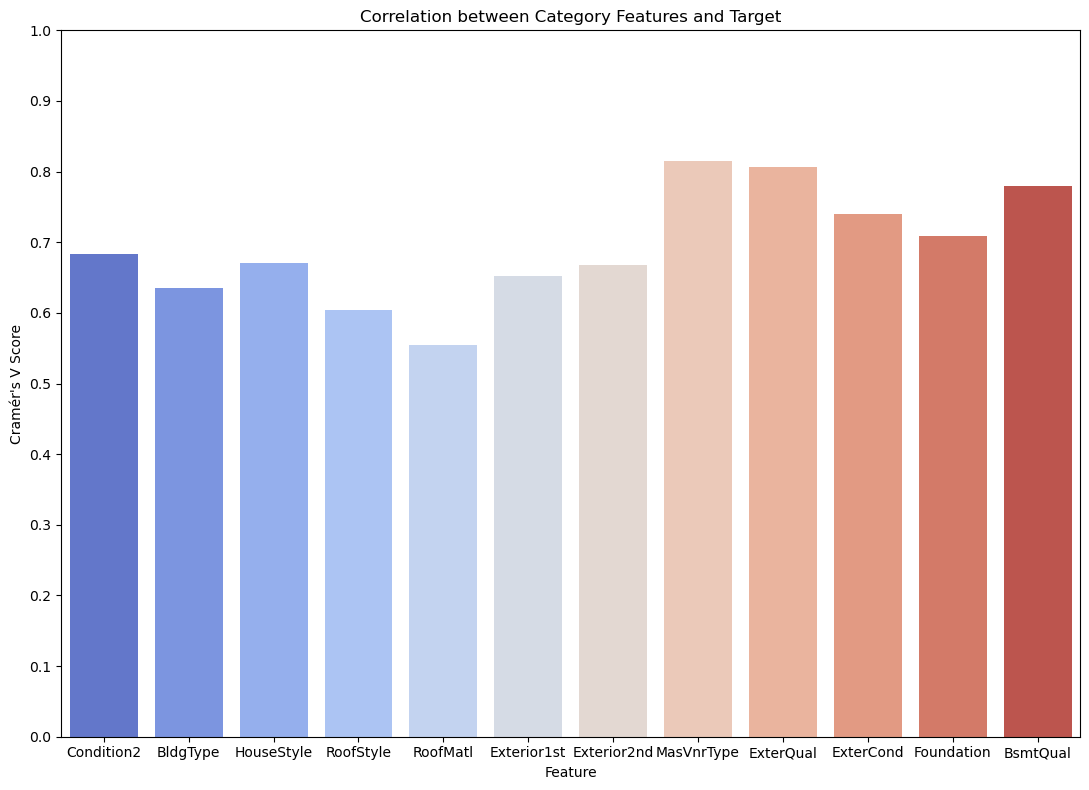

In [60]:
correlation_category_target(data1,cat_features[11:23])

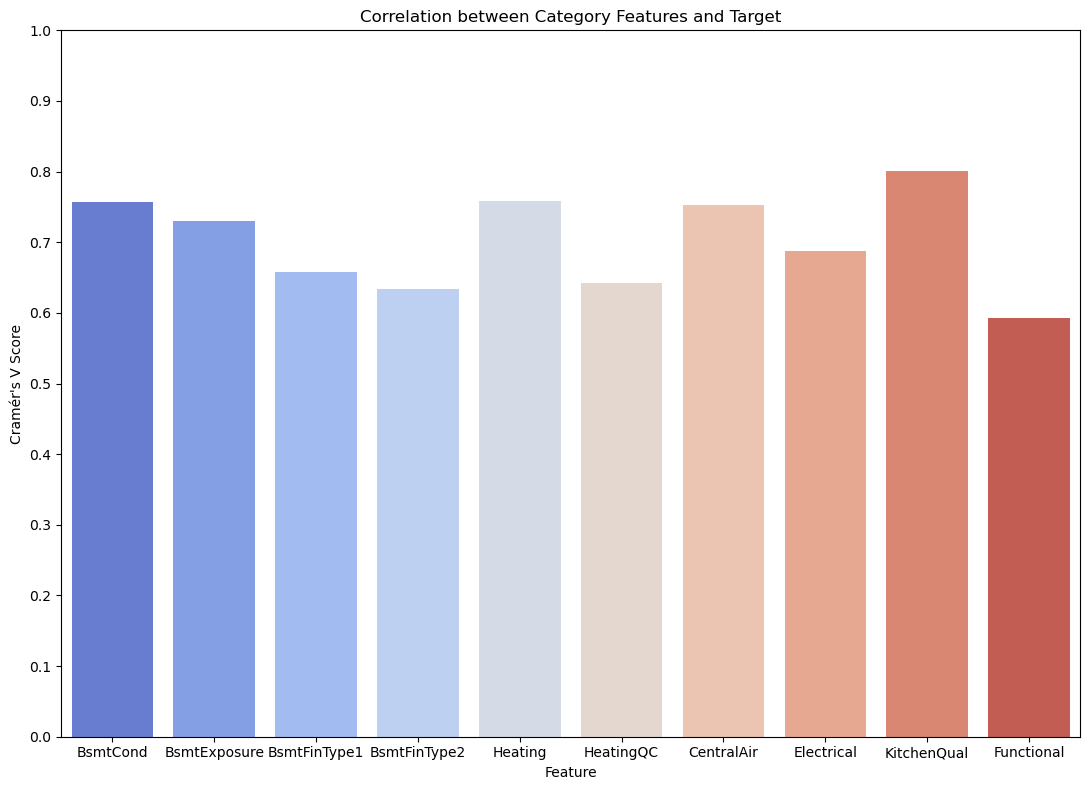

In [61]:
correlation_category_target(data1,cat_features[23:33])

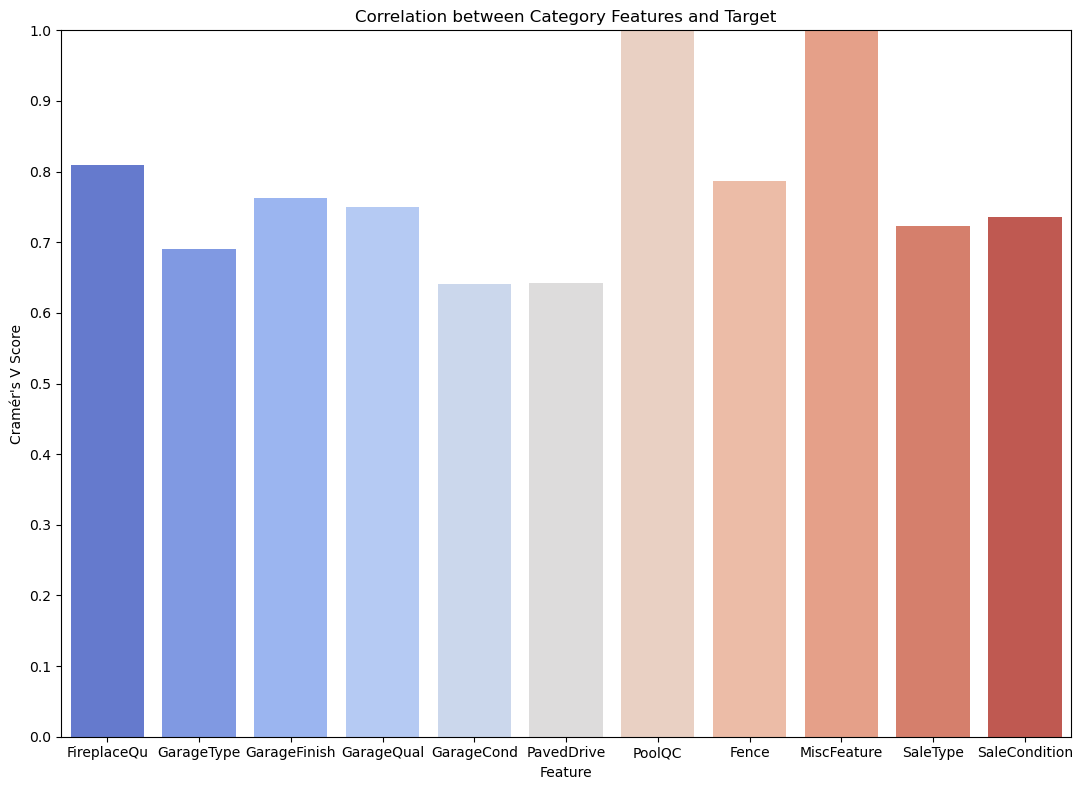

In [62]:
correlation_category_target(data1,cat_features[33:])

- Ghi chú:
  * Tất cả các `cat_features` đều tương thích mạnh đối với target

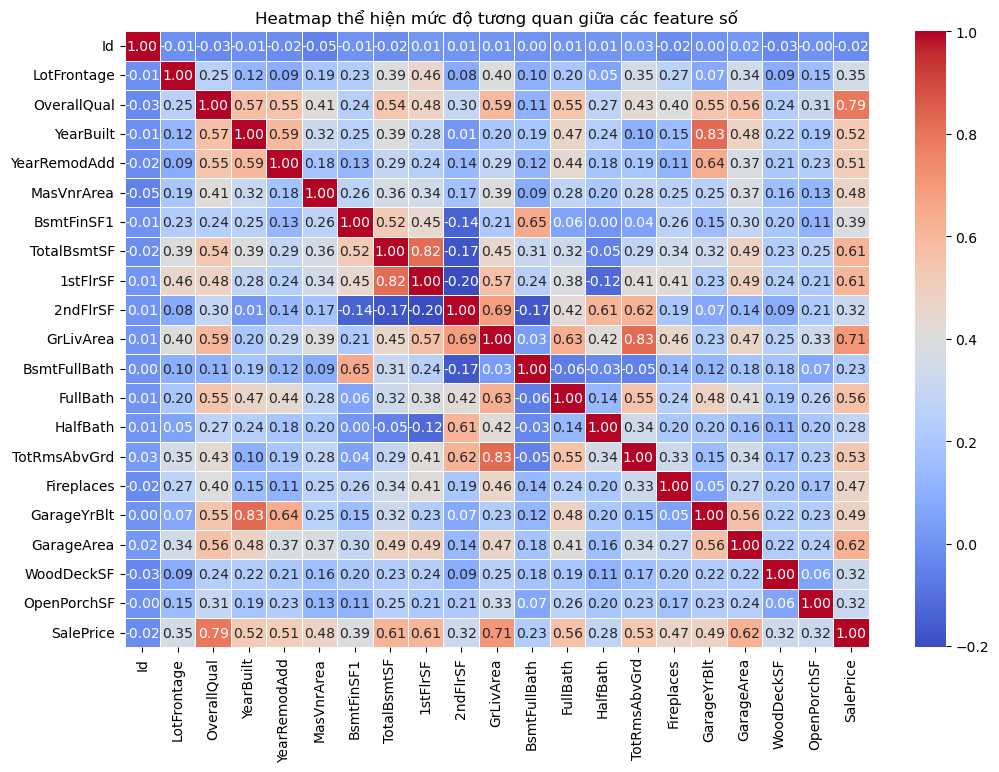

In [104]:

# Tính ma trận tương quan
corr_matrix = data1.select_dtypes(np.number).corr()

fig = plt.figure(figsize=(12,8))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Heatmap thể hiện mức độ tương quan giữa các feature số")
plt.show()

- Ghi chú:
  * Giữa đặc trưng `GarageCars` và `GarageArea` có sư tương quan cao nên sẽ xóa features GarageCars

In [100]:
for data in data_cleaner:
    data.drop(columns=['GarageCars'],inplace=True)

In [106]:
data1.describe(include='number')

,Id,LotFrontage,OverallQual,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,TotalBsmtSF,1stFlrSF,2ndFlrSF,...,BsmtFullBath,FullBath,HalfBath,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageArea,WoodDeckSF,OpenPorchSF,SalePrice
count,1460.000000,1201.000000,1460.000000,1460.000000,1460.000000,1452.000000,1460.000000,1460.000000,1460.000000,1460.000000,...,1460.000000,1460.000000,1460.000000,1460.000000,1460.000000,1379.000000,1460.000000,1460.000000,1460.000000,1460.000000
mean,730.500000,70.049958,6.099315,1971.267808,1984.865753,103.685262,443.639726,1057.429452,1162.626712,346.992466,...,0.425342,1.565068,0.382877,6.517808,0.613014,1978.506164,472.980137,94.244521,46.660274,180921.195890
std,421.610009,24.284752,1.382997,30.202904,20.645407,181.066207,456.098091,438.705324,386.587738,436.528436,...,0.518911,0.550916,0.502885,1.625393,0.644666,24.689725,213.804841,125.338794,66.256028,79442.502883
min,1.000000,21.000000,1.000000,1872.000000,1950.000000,0.000000,0.000000,0.000000,334.000000,0.000000,...,0.000000,0.000000,0.000000,2.000000,0.000000,1900.000000,0.000000,0.000000,0.000000,34900.000000
25%,365.750000,59.000000,5.000000,1954.000000,1967.000000,0.000000,0.000000,795.750000,882.000000,0.000000,...,0.000000,1.000000,0.000000,5.000000,0.000000,1961.000000,334.500000,0.000000,0.000000,129975.000000
50%,730.500000,69.000000,6.000000,1973.000000,1994.000000,0.000000,383.500000,991.500000,1087.000000,0.000000,...,0.000000,2.000000,0.000000,6.000000,1.000000,1980.000000,480.000000,0.000000,25.000000,163000.000000
75%,1095.250000,80.000000,7.000000,2000.000000,2004.000000,166.000000,712.250000,1298.250000,1391.250000,728.000000,...,1.000000,2.000000,1.000000,7.000000,1.000000,2002.000000,576.000000,168.000000,68.000000,214000.000000
max,1460.000000,313.000000,10.000000,2010.000000,2010.000000,1600.000000,5644.000000,6110.000000,4692.000000,2065.000000,...,3.000000,3.000000,2.000000,14.000000,3.000000,2010.000000,1418.000000,857.000000,547.000000,755000.000000


## Bước 5: Tiền sữ lí dữ liệu

### Sữ lí dữ liệu bị thiếu

In [155]:
for data in data_cleaner:
    missing_values = data.isna().sum()  # Đếm số giá trị NaN trong mỗi cột
    missing_values = missing_values[missing_values > 0 ]  # Chỉ giữ lại các cột có giá trị bị thiếu
    missing_precent = round(missing_values * 100 / len(data), 2)
    print(missing_precent)  # In ra danh sách các cột có giá trị bị thiếu kèm phần trăm
    print("-" * 20)


MasVnrArea      0.55
BsmtQual        2.53
BsmtCond        2.53
BsmtExposure    2.60
BsmtFinType1    2.53
BsmtFinType2    2.60
Electrical      0.07
GarageType      5.55
GarageYrBlt     5.55
GarageFinish    5.55
GarageQual      5.55
GarageCond      5.55
dtype: float64
--------------------
MSZoning        0.27
Utilities       0.14
Exterior1st     0.07
Exterior2nd     0.07
MasVnrArea      1.03
BsmtQual        3.02
BsmtCond        3.08
BsmtExposure    3.02
BsmtFinType1    2.88
BsmtFinSF1      0.07
BsmtFinType2    2.88
TotalBsmtSF     0.07
BsmtFullBath    0.14
KitchenQual     0.07
Functional      0.14
GarageType      5.21
GarageYrBlt     5.35
GarageFinish    5.35
GarageArea      0.07
GarageQual      5.35
GarageCond      5.35
SaleType        0.07
dtype: float64
--------------------


#### `Alley`


In [109]:
for data in data_cleaner:
    data['HasAlley'] = data['Alley'].notna().astype(int)
    data.drop(columns= ['Alley'],inplace = True)

#### `PoolQC`

In [114]:
for data in data_cleaner:
    data['HasPool'] = data['PoolQC'].notna().astype(int)
    data.drop(columns= ['PoolQC'],inplace = True)

#### `MiscFeature`

In [115]:
for data in data_cleaner:
    data['HasMiscFeature'] = data['MiscFeature'].notna().astype(int)
    data.drop(columns = ['MiscFeature'],inplace = True)

#### `Fence`

In [117]:
for data in data_cleaner:
    data['HasFence'] = data['Fence'].notna().astype(int)
    data.drop(columns = ['Fence'],inplace = True)

#### `MasVnrType`

In [136]:
for data in data_cleaner:
    HMV_bef = data['MasVnrType'].isna().sum()
    data['HasMasVnr'] = data['MasVnrType'].notna().astype(int)
    data["MasVnrType"] = data['MasVnrType'].astype(str).fillna('None').astype('category')
    print("# MasVnrType missing count before:",HMV_bef)
    print("# MasVnrType missing count after:",data['MasVnrType'].isna().sum())

# MasVnrType missing count before: 872
# MasVnrType missing count after: 0
# MasVnrType missing count before: 894
# MasVnrType missing count after: 0


#### `FireplaceQu`

In [146]:
for data in data_cleaner:
    FPQ_bef = data['FireplaceQu'].isna().sum()
    data['HasFireplace'] = data['FireplaceQu'].notna().astype(int)
    data['FireplaceQu'] = data['FireplaceQu'].astype('str') 
    data.loc[data['FireplaceQu'].isna() & data['Fireplaces'] == 0,"FireplaceQu"] = "None"
    data['FireplaceQu'] = data['FireplaceQu'].astype('category') 
    print("# FireplaceQu missing count before:",FPQ_bef)
    print("# FireplaceQu missing count after:",data['FireplaceQu'].isna().sum())

# FireplaceQu missing count before: 690
# FireplaceQu missing count after: 0
# FireplaceQu missing count before: 730
# FireplaceQu missing count after: 0


#### `LotFrontage`

In [154]:
for data in data_cleaner:
    LF_bef = data['LotFrontage'].isna().sum()
    data.loc[data['LotFrontage'].isna() ,"LotFrontage"] = data['LotFrontage'].mean()
    print("# LotFrontage missing count before:",LF_bef)
    print("# LotFrontage missing count after:",data['LotFrontage'].isna().sum())

# LotFrontage missing count before: 259
# LotFrontage missing count after: 0
# LotFrontage missing count before: 227
# LotFrontage missing count after: 0


In [158]:
data1.select_dtypes(include=['number']).columns


Index(['Id', 'LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'SalePrice', 'HasAlley', 'HasPool', 'HasMiscFeature', 'HasFence',
       'HasMasVnr', 'HasFireplace'],
      dtype='object')

In [160]:
# preprocess pipeline
from sklearn.preprocessing import OrdinalEncoder,StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
cat_features = ['MSSubClass', 'MSZoning', 'Street', 'LotShape', 'LandContour',
       'Utilities', 'LotConfig', 'LandSlope', 'Neighborhood', 'Condition1',
       'Condition2', 'BldgType', 'HouseStyle', 'RoofStyle', 'RoofMatl',
       'Exterior1st', 'Exterior2nd', 'MasVnrType', 'ExterQual', 'ExterCond',
       'Foundation', 'BsmtQual', 'BsmtCond', 'BsmtExposure', 'BsmtFinType1',
       'BsmtFinType2', 'Heating', 'HeatingQC', 'CentralAir', 'Electrical',
       'KitchenQual', 'Functional', 'FireplaceQu', 'GarageType',
       'GarageFinish', 'GarageQual', 'GarageCond', 'PavedDrive', 'SaleType',
       'SaleCondition']
num_features = ['LotFrontage', 'OverallQual', 'YearBuilt', 'YearRemodAdd',
       'MasVnrArea', 'BsmtFinSF1', 'TotalBsmtSF', '1stFlrSF', '2ndFlrSF',
       'GrLivArea', 'BsmtFullBath', 'FullBath', 'HalfBath', 'TotRmsAbvGrd',
       'Fireplaces', 'GarageYrBlt', 'GarageArea', 'WoodDeckSF', 'OpenPorchSF',
       'HasAlley', 'HasPool', 'HasMiscFeature', 'HasFence',
       'HasMasVnr', 'HasFireplace']
feature_cols = cat_features + num_features
X = data1[feature_cols]
y = data1[target]
X_test = data_val[feature_cols]

num_transformer = Pipeline(steps = [
    ('imputer',SimpleImputer(strategy = "median")),
    ("scaler",StandardScaler())
])

cat_transformer = Pipeline(steps = [
    ("imputer",SimpleImputer(strategy = "most_frequent")),
    ("encoder",OrdinalEncoder())
])



In [161]:
preprocessor = ColumnTransformer(transformers=[
    ('num',num_transformer,num_features),
    ('cat',cat_transformer,cat_features)
])


In [162]:
dataX = preprocessor.fit_transform(X)
dataX_test = preprocessor.fit_transform(X_test)

In [246]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
dataY = scaler.fit_transform(y)


## Bước 5: Huấn luyện mô hình

In [186]:
from sklearn.model_selection import train_test_split
X_train,X_val,y_train,y_val = train_test_split(dataX,dataY,test_size = 0.2,random_state=42,shuffle=True)

In [187]:
X_train.shape,y_train.shape

((1168, 65), (1168,))

In [188]:
X_val.shape,y_val.shape

((292, 65), (292,))

In [221]:
from sklearn import model_selection, ensemble, linear_model, neighbors, svm, tree
from xgboost import XGBRegressor
from lightgbm import LGBMRegressor
from sklearn.metrics import make_scorer, mean_absolute_error, r2_score
# Danh sách các mô hình cập nhật
MLA = [
    sklearn.linear_model.LinearRegression(),
    sklearn.linear_model.Ridge(alpha=1.0),
    
    sklearn.neighbors.KNeighborsRegressor(),
    
    XGBRegressor(),
    LGBMRegressor(),

    sklearn.tree.DecisionTreeRegressor(max_depth=5),
    sklearn.ensemble.RandomForestRegressor(n_estimators=100, max_depth=5),
    sklearn.ensemble.GradientBoostingRegressor(n_estimators=100, learning_rate=0.1)

]

#split dataset in cross-validation with this splitter class: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.ShuffleSplit.html#sklearn.model_selection.ShuffleSplit
#note: this is an alternative to train_test_split
cv_split = model_selection.ShuffleSplit(n_splits = 10, test_size = .3, train_size = .7, random_state = 0 ) # run model 10x with 60/30 split intentionally leaving out 10%

#create table to compare MLA metrics
MLA_columns = ['MLA Name', 'MLA Parameters','MLA Train MAE Mean','MLA Test MAE Mean','MLA Train R2 Mean','MLA Test R2 Mean','MLA Time']
MLA_compare = pd.DataFrame(columns = MLA_columns)

#index through MLA and save performance to table
row_index = 0
for alg in MLA:

    #set name and parameters
    MLA_name = alg.__class__.__name__
    MLA_compare.loc[row_index, 'MLA Name'] = MLA_name
    MLA_compare.loc[row_index, 'MLA Parameters'] = str(alg.get_params())

    scoring = {
    'MAE': make_scorer(mean_absolute_error, greater_is_better=False),
    'R2': make_scorer(r2_score)
    }

    #score model with cross validation: http://scikit-learn.org/stable/modules/generated/sklearn.model_selection.cross_validate.html#sklearn.model_selection.cross_validate
    cv_results = model_selection.cross_validate(alg, dataX, dataY,scoring = scoring ,cv  = cv_split, return_train_score=True )

    MLA_compare.loc[row_index, 'MLA Time'] = cv_results['fit_time'].mean()
    MLA_compare.loc[row_index, 'MLA Train MAE Mean'] = -cv_results['train_MAE'].mean()
    MLA_compare.loc[row_index, 'MLA Test MAE Mean'] = -cv_results['test_MAE'].mean()
    MLA_compare.loc[row_index, 'MLA Train R2 Mean'] = cv_results['train_R2'].mean()
    MLA_compare.loc[row_index, 'MLA Test R2 Mean'] = cv_results['test_R2'].mean()
    row_index+=1
    
#print and sort table: https://pandas.pydata.org/pandas-docs/stable/generated/pandas.DataFrame.sort_values.html
MLA_compare.sort_values(by = ['MLA Test MAE Mean','MLA Test R2 Mean'], ascending = [True,False], inplace = True)
MLA_compare
#MLA_predict

[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000431 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2257
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 59
[LightGBM] [Info] Start training from score 0.015049
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.000561 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, you can set `force_col_wise=true`.
[LightGBM] [Info] Total Bins 2190
[LightGBM] [Info] Number of data points in the train set: 876, number of used features: 58
[LightGBM] [Info] Start training from score -0.049380
[LightGBM] [Info] Auto-choosing row-wise multi-threading, the overhead of testing was 0.001581 seconds.
You can set `force_row_wise=true` to remove the overhead.
And if memory is not enough, 

,MLA Name,MLA Parameters,MLA Train MAE Mean,MLA Test MAE Mean,MLA Train R2 Mean,MLA Test R2 Mean,MLA Time
7,GradientBoostingRegressor,"{'alpha': 0.9, 'ccp_alpha': 0.0, 'criterion': ...",0.129678,0.228495,0.970061,0.857153,0.478777
4,LGBMRegressor,"{'boosting_type': 'gbdt', 'class_weight': None...",0.069662,0.233625,0.974054,0.852216,0.224391
3,XGBRegressor,"{'objective': 'reg:squarederror', 'base_score'...",0.005859,0.243722,0.999923,0.842444,0.339382
6,RandomForestRegressor,"{'bootstrap': True, 'ccp_alpha': 0.0, 'criteri...",0.202944,0.265587,0.91851,0.822975,0.588249
1,Ridge,"{'alpha': 1.0, 'copy_X': True, 'fit_intercept'...",0.240025,0.278769,0.856589,0.765002,0.001996
0,LinearRegression,"{'copy_X': True, 'fit_intercept': True, 'n_job...",0.240111,0.279921,0.85667,0.762102,0.003788
2,KNeighborsRegressor,"{'algorithm': 'auto', 'leaf_size': 30, 'metric...",0.265595,0.336707,0.811341,0.711257,0.001097
5,DecisionTreeRegressor,"{'ccp_alpha': 0.0, 'criterion': 'squared_error...",0.253046,0.345626,0.879244,0.723475,0.010871


Text(0, 0.5, 'Algorithm')

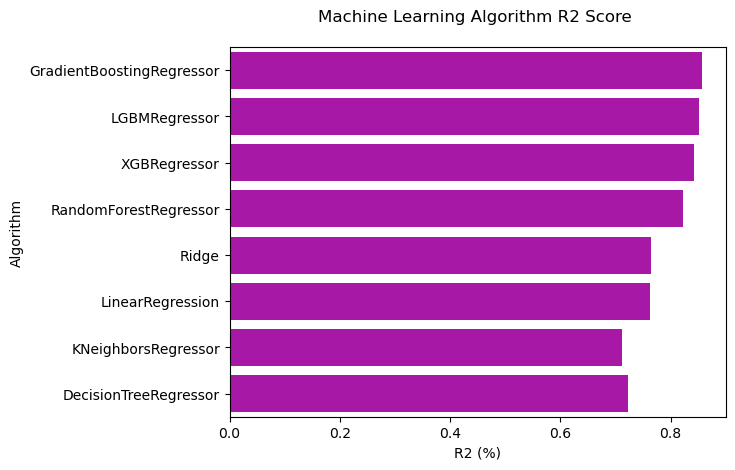

In [222]:
#barplot using https://seaborn.pydata.org/generated/seaborn.barplot.html
sns.barplot(x='MLA Test R2 Mean', y = 'MLA Name', data = MLA_compare, color = 'm')

#prettify using pyplot: https://matplotlib.org/api/pyplot_api.html
plt.title('Machine Learning Algorithm R2 Score \n')
plt.xlabel('R2 (%)')
plt.ylabel('Algorithm')

In [208]:
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.metrics import mean_absolute_error, r2_score

# 1. Mô hình Base
base_model = GradientBoostingRegressor(random_state=42)
base_model.fit(X_train, y_train)
y_pred_base = base_model.predict(X_val)

base_mae = mean_absolute_error(y_val, y_pred_base)
base_r2 = r2_score(y_val, y_pred_base)

# 2. Grid Search để tìm tham số tốt nhất
param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.05, 0.1],
    'max_depth': [3, 4, 5],
    'min_samples_split': [2, 5, 10]
}

grid_search = GridSearchCV(GradientBoostingRegressor(random_state=42), param_grid, cv=5, scoring='neg_mean_absolute_error', n_jobs=-1)
grid_search.fit(X_train, y_train)

# 3. Mô hình tối ưu sau khi tùy chỉnh
best_model = grid_search.best_estimator_
y_pred_best = best_model.predict(X_val)

base_mae = mean_absolute_error(y_val, y_pred_base)
base_r2 = r2_score(y_val, y_pred_base)

print(f"Base Model MAE: {base_mae:.4f}")
print(f"Base Model R²: {base_r2:.4f}")
print("Best Hyperparameters:", grid_search.best_params_)

# So sánh
print(f"Base Model MAE: {base_mae:.4f}")
print(f"Base Model R²: {base_r2:.4f}")


Base Model MAE: 0.2262
Base Model R²: 0.8846
Best Hyperparameters: {'learning_rate': 0.1, 'max_depth': 3, 'min_samples_split': 5, 'n_estimators': 200}
Base Model MAE: 0.2262
Base Model R²: 0.8846


In [209]:
import joblib
joblib.dump(best_model, 'best_model.joblib')

['best_model.joblib']

In [229]:
from joblib import load
from sklearn.metrics import mean_absolute_error, r2_score

# Load best model
Load_model = load("best_model.joblib")

# Dự đoán trên tập validation
y_pred_base = Load_model.predict(X_val)

# Đánh giá hiệu suất mô hình
base_mae = mean_absolute_error(y_val, y_pred_base)
base_r2 = r2_score(y_val, y_pred_base)

print(f"Base Model MAE: {base_mae:.4f}")
print(f"Base Model R²: {base_r2:.4f}")


Base Model MAE: 0.2172
Base Model R²: 0.8961


In [249]:
y_test_pred = Load_model.predict(dataX_test)
data_val["SalePrice"] = scaler.inverse_transform(y_test_pred.reshape(-1,1))
# Xuất ra file CSV
data_val[["Id","SalePrice"]].to_csv("predicted_values.csv",index=False)